# house predict project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selectoin import train_test_split

In [2]:
dataset = pd.read_csv("D:\\Office Data\\Downloads\\1553768847-housing.csv.zip")
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [35]:

X = dataset[["median_income", "total_rooms", "housing_median_age", "households"]]
y = dataset["median_house_value"]

# --- Step 4: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

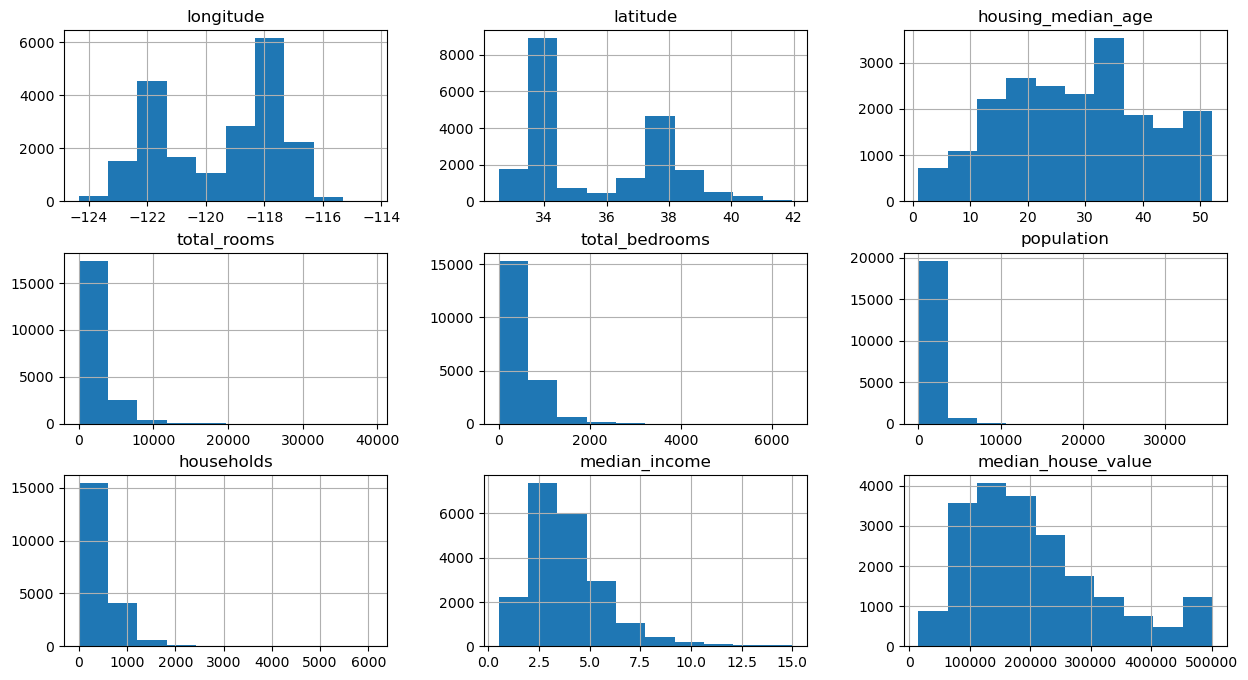

In [67]:
dataset.hist(figsize=(15,8))

In [71]:
dataset.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [75]:
# Convert categorical column 'ocean_proximity' into dummy (one-hot) variables
dataset = dataset.join(pd.get_dummies(dataset["ocean_proximity"])).drop(["ocean_proximity"], axis=1)

print("✅ One-hot encoding done!")
print(dataset.head())


✅ One-hot encoding done!
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  <1H OCEAN  \
0         322         126         8.3252              452600      False   
1        2401        1138         8.3014              358500      False   
2         496         177         7.2574              352100      False   
3         558         219         5.6431              341300      False   
4         565         259         3.8462              342200      False   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0   False   False      True    

<Axes: >

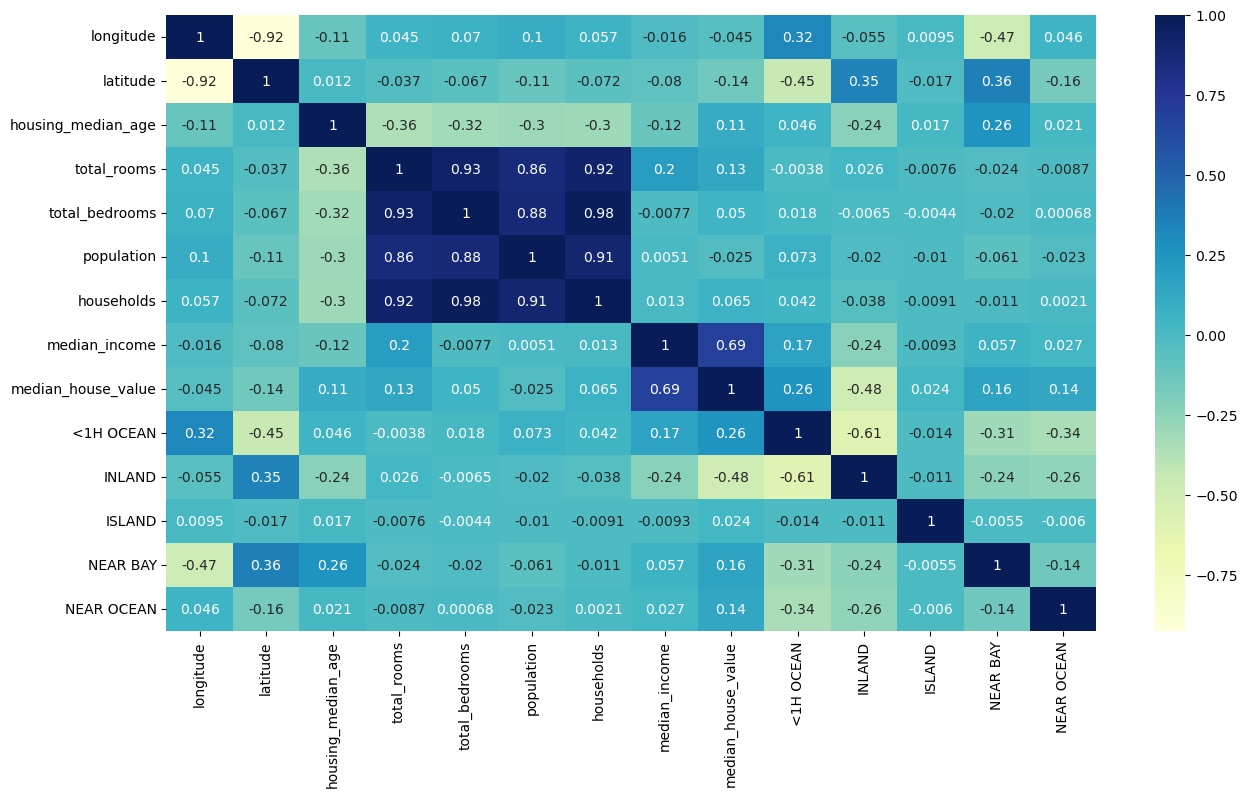

In [76]:

plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")


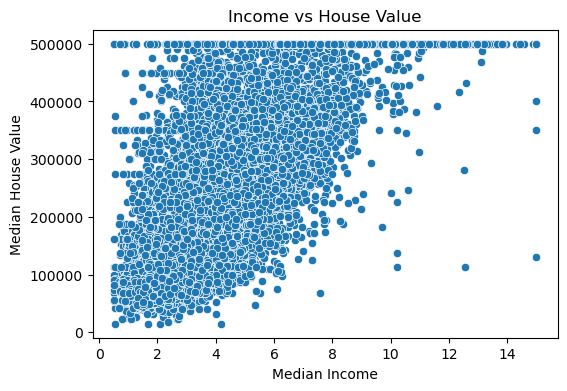

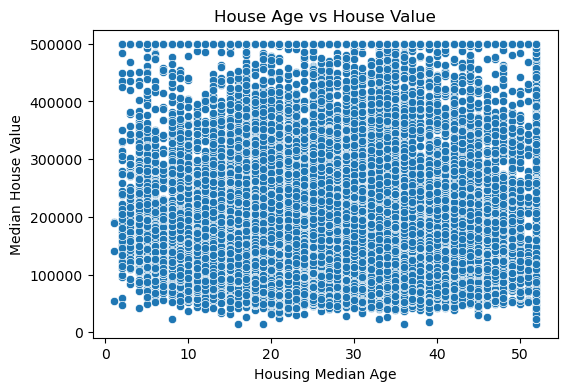

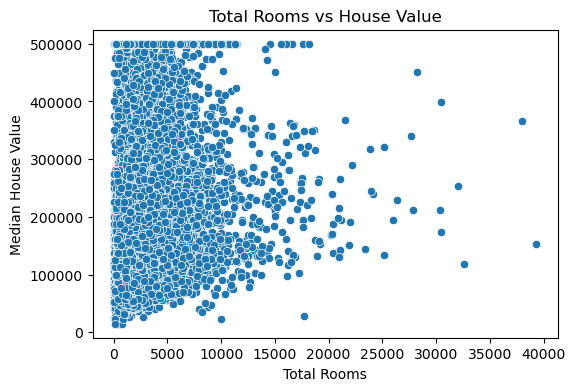

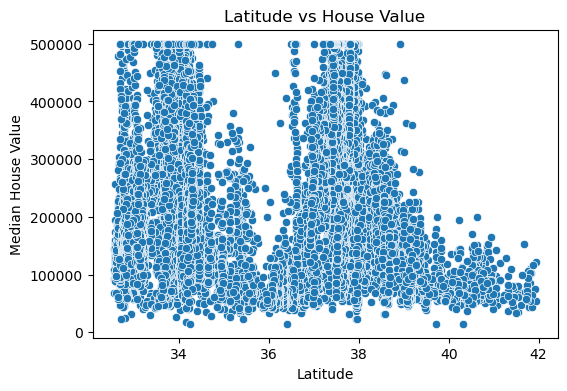

In [78]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="median_income", y="median_house_value", data=dataset)
plt.title("Income vs House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="housing_median_age", y="median_house_value", data=dataset)
plt.title("House Age vs House Value")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="total_rooms", y="median_house_value", data=dataset)
plt.title("Total Rooms vs House Value")
plt.xlabel("Total Rooms")
plt.ylabel("Median House Value")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="latitude", y="median_house_value", data=dataset)
plt.title("Latitude vs House Value")
plt.xlabel("Latitude")
plt.ylabel("Median House Value")
plt.show()

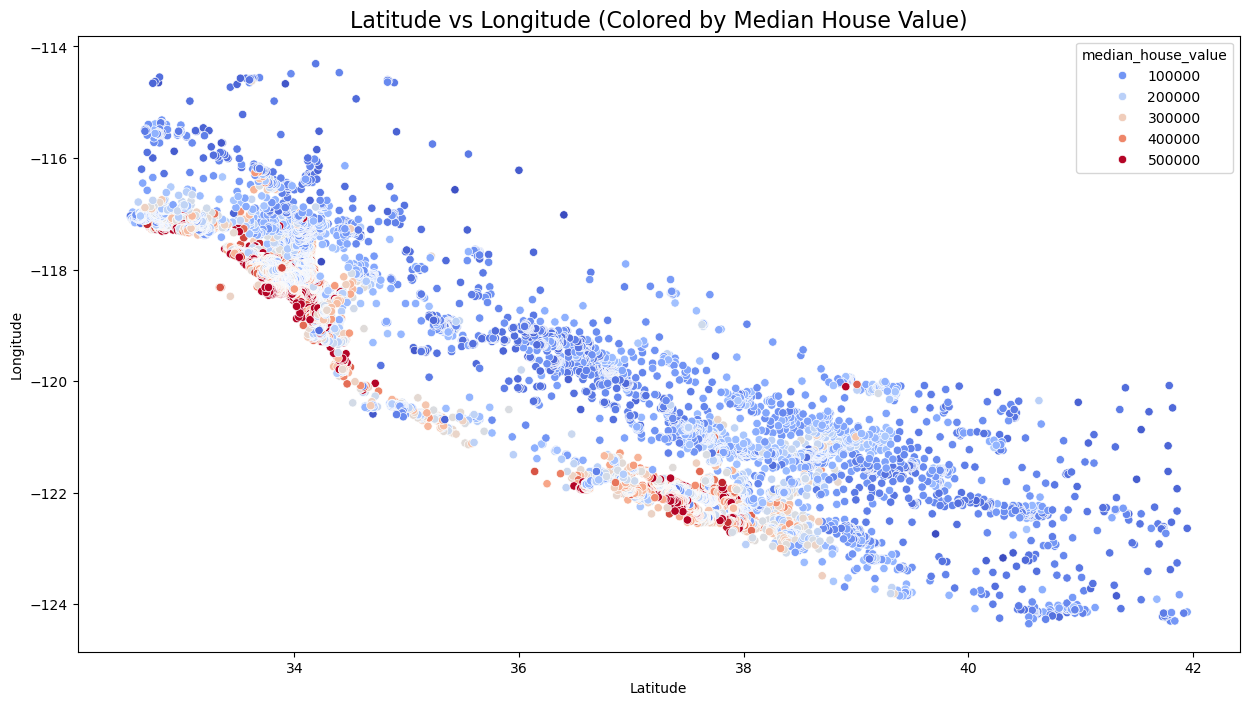

In [83]:
plt.figure(figsize=(15,8))

sns.scatterplot(
    x="latitude",
    y="longitude",
    data=dataset,
    hue="median_house_value",
    palette="coolwarm"
)

plt.title("Latitude vs Longitude (Colored by Median House Value)", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


<Axes: >

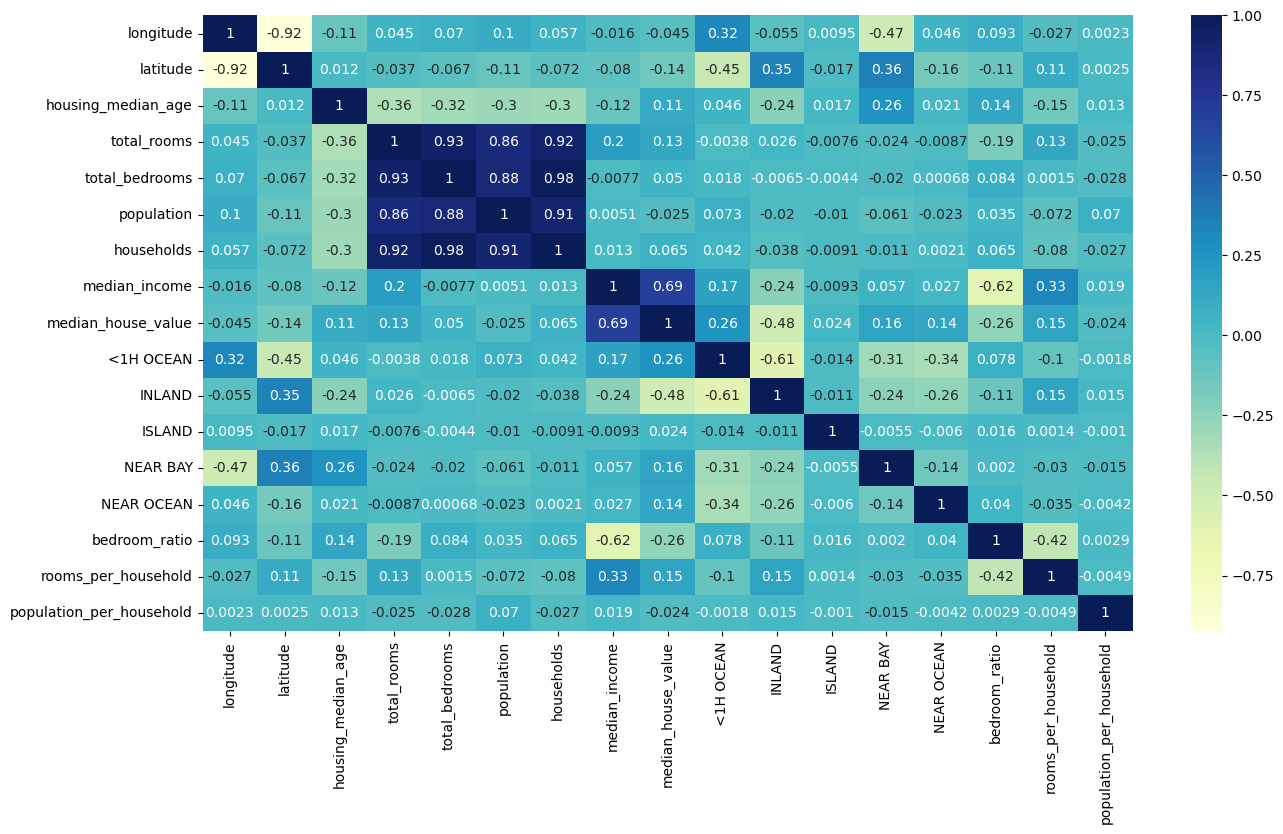

In [92]:
# Create new calculated columns
dataset["bedroom_ratio"] = dataset["total_bedrooms"] / dataset["total_rooms"]
dataset["rooms_per_household"] = dataset["total_rooms"] / dataset["households"]
dataset["population_per_household"] = dataset["population"] / dataset["households"]


plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")
